# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [71]:
states = glob.glob('states*.csv')
df = pd.concat([pd.read_csv(f) for f in states], ignore_index=True)

df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [72]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(60, 11)
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [73]:
print(df.State.duplicated().sum()) # there are some duplicated states
print(df.State.unique()) # unique states (District of Columbia is included and should be dropped)
print(df.isna().sum()) # pacific


9
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin']
Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
dtype: int64


In [74]:
df.State.value_counts()

State
Missouri                2
Utah                    2
New Jersey              2
Maryland                2
Ohio                    2
Iowa                    2
Georgia                 2
Rhode Island            2
Colorado                2
Texas                   1
Oklahoma                1
West Virginia           1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Washington              1
Virginia                1
Oregon                  1
Tennessee               1
Pennsylvania            1
Puerto Rico             1
Nevada                  1
South Carolina          1
South Dakota            1
Vermont                 1
New Hampshire           1
Alabama                 1
Nebraska                1
Illinois                1
Arizona                 1
Arkansas                1
California              1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Hawaii                  1
Idaho 

4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [75]:
# income - take out the dollar sign and comma + convert to numeric
# percentages - take out percentage sing and convert to numeric
# split gener prop into MalePop and Femalepop


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [76]:
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True)
df['Income'] = pd.to_numeric(df['Income'])
df.head()


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [77]:
men_women = df.GenderPop.str.split('_')
df['MalePop'] = men_women.str.get(0)
df['FemalePop'] = men_women.str.get(1)
# get rid of M and F, to Numeric
df['MalePop'] = df['MalePop'].str.replace('M','', regex=True)
df['FemalePop'] = df['FemalePop'].str.replace('F','', regex=True)
df['MalePop'] = pd.to_numeric(df['MalePop'])
df['FemalePop'] = pd.to_numeric(df['FemalePop'])
print(df.head())
df[['MalePop','FemalePop']].describe()


   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop   MalePop   FemalePop  
0   0.03%  43296.36    2341093M_2489527F   2341093   2489527.0  
1   1.06%  70354.74      384160M_349215F    384160    349215.0  
2   0.17%  54207.82    3299088M_3342840F   3299088   3342840.0  
3   0.15%  41935.63    1451913M_1506295F   1451913   1506295.0  
4   0.35%  67264.78  19087135M_19334329F  19087135  19334329.0  


,MalePop,FemalePop
count,6.000000e+01,5.700000e+01
mean,3.067189e+06,3.222093e+06
std,3.250785e+06,3.407467e+06
min,3.066740e+05,3.180310e+05
25%,1.006712e+06,1.051703e+06
50%,2.291782e+06,2.364097e+06
75%,3.631031e+06,4.195682e+06
max,1.908714e+07,1.933433e+07


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [78]:
# done in cell above

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

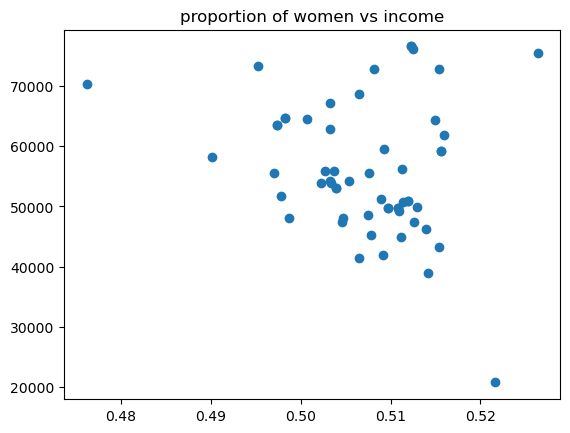

In [79]:
proportion_of_women = df['FemalePop'] / df['TotalPop']
plt.scatter(proportion_of_women, df.Income)
plt.title('proportion of women vs income')
plt.show()
plt.close()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [80]:
df.FemalePop.isna().sum() # no missing values
df = df.fillna(value={'FemalePop': df.TotalPop - df.MalePop})
df.FemalePop.isna().sum() # no missing values
print(df.FemalePop)


0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [81]:
df.State.duplicated().value_counts() # no duplicates
df.drop_duplicates(subset='State', inplace=True)
df.State.duplicated().value_counts() # no duplicates
df.drop(df[df.State == 'District of Columbia'].index, inplace=True)


11. Drop those duplicates using the `.drop_duplicates()` function.

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

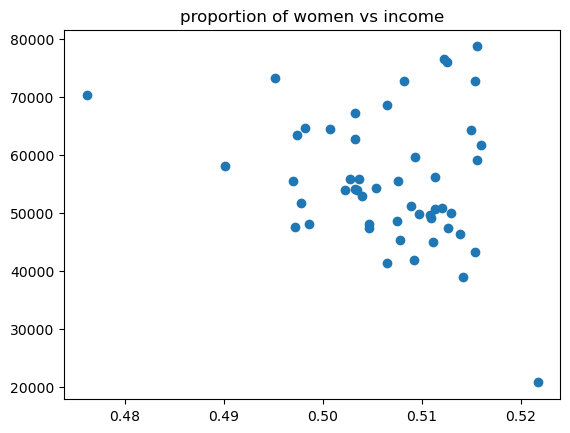

In [82]:
proportion_of_women = df['FemalePop'] / df['TotalPop']
plt.scatter(proportion_of_women, df.Income)
plt.title('proportion of women vs income')
plt.show()
plt.close()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [85]:
df.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'MalePop',
       'FemalePop'],
      dtype='object')

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [94]:

# get rid of % and to numeric
df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']] = df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].replace({'%': ''}, regex=True)
df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']] = df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].apply(pd.to_numeric)
pacific_mean = df.Pacific.mean()
df.Pacific = df.Pacific.fillna(pacific_mean)
df.Pacific.isna().sum() # no missing values
df.info()
#df.Pacific = df.Pacific.fillna(

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 59
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   State       50 non-null     object 
 2   TotalPop    50 non-null     int64  
 3   Hispanic    50 non-null     float64
 4   White       50 non-null     float64
 5   Black       50 non-null     float64
 6   Native      50 non-null     float64
 7   Asian       50 non-null     float64
 8   Pacific     50 non-null     float64
 9   Income      50 non-null     float64
 10  GenderPop   50 non-null     object 
 11  MalePop     50 non-null     int64  
 12  FemalePop   50 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 5.5+ KB


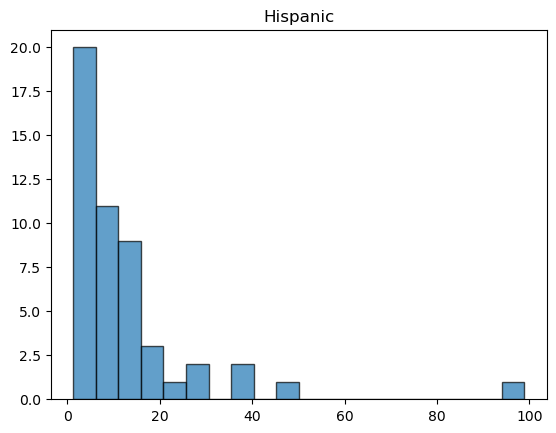

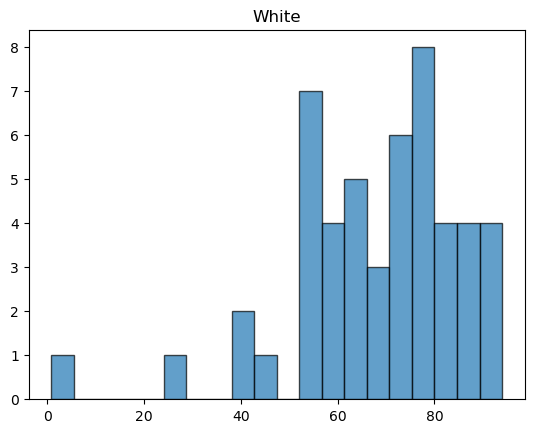

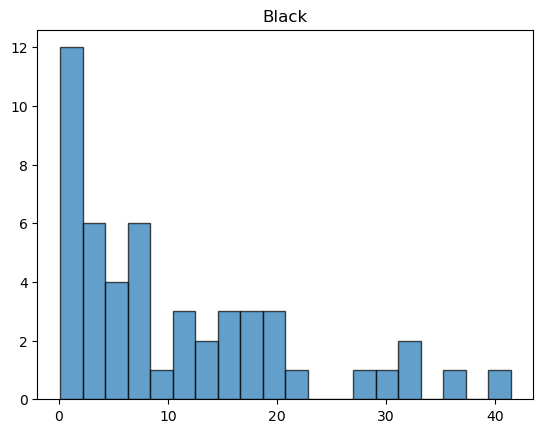

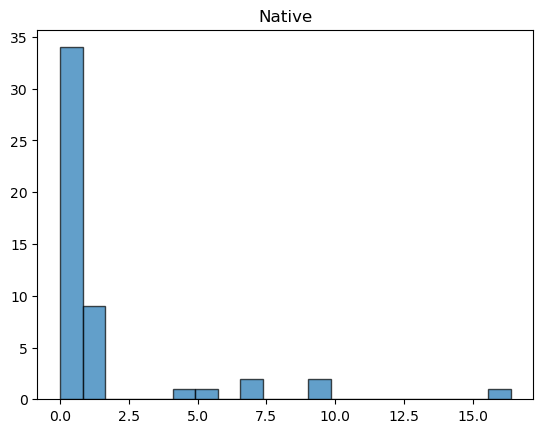

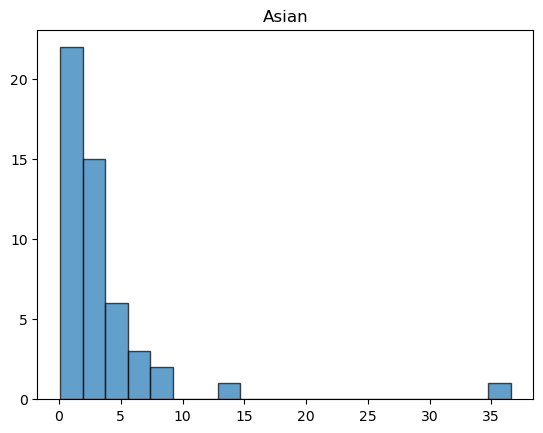

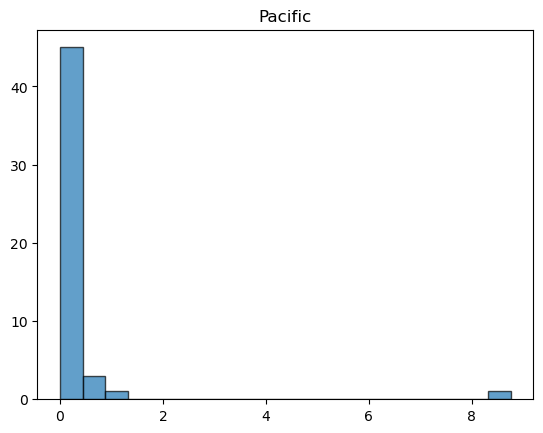

In [104]:
list_of_races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for race in list_of_races:
    plt.hist(df[race], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'{race}')
    plt.show()
    plt.close()


## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.